In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
housing_data=pd.read_csv('datasets/housing.csv')
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
548,-122.27,37.77,52.0,2388.0,559.0,1121.0,518.0,3.3269,234500.0,NEAR BAY
16766,-122.48,37.69,33.0,2347.0,512.0,1259.0,481.0,3.4492,264300.0,NEAR OCEAN
8089,-118.21,33.81,43.0,905.0,199.0,764.0,204.0,3.3214,162200.0,NEAR OCEAN
356,-122.16,37.76,36.0,2781.0,574.0,1438.0,519.0,2.4598,155500.0,NEAR BAY
4516,-118.20,34.03,52.0,1754.0,452.0,1849.0,445.0,2.3716,122800.0,<1H OCEAN


# Data Prep

In [4]:
housing_data=housing_data.dropna()

In [5]:
housing_data.shape

(20433, 10)

In [7]:
housing_data.loc[housing_data['median_house_value'] == 500001].count()

longitude             958
latitude              958
housing_median_age    958
total_rooms           958
total_bedrooms        958
population            958
households            958
median_income         958
median_house_value    958
ocean_proximity       958
dtype: int64

In [10]:
housing_data=housing_data.drop(housing_data.loc[housing_data['median_house_value'] == 500001].index)

In [12]:
housing_data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [13]:
housing_data['ocean_proximity'].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

In [18]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [24]:
housing_data=pd.get_dummies(housing_data)
#housing_data=pd.get_dummies(housing_data, columns=['ocean_proximity'])


In [26]:
housing_data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [27]:
housing_data.sample(5)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7018,-118.09,33.97,39.0,1473.0,297.0,1108.0,294.0,4.1389,166000.0,1,0,0,0,0
14140,-117.08,32.75,20.0,1989.0,508.0,1452.0,462.0,2.0077,118300.0,0,0,0,0,1
6624,-118.14,34.17,52.0,2667.0,486.0,1681.0,504.0,4.0524,173100.0,1,0,0,0,0
16102,-122.50,37.76,46.0,2226.0,480.0,1272.0,468.0,4.2644,284100.0,0,0,0,0,1
5900,-118.31,34.17,12.0,3188.0,931.0,2118.0,850.0,3.1823,218300.0,1,0,0,0,0


In [30]:
X=housing_data.drop('median_house_value', axis=1)
y=housing_data['median_house_value']

In [31]:
X.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [33]:
from sklearn.model_selection import train_test_split

In [34]:
x_train, x_test, y_train, y_test = train_test_split?

In [36]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [37]:
x_train.shape, x_test.shape

((15580, 13), (3895, 13))

# Model Training

In [38]:
from sklearn.linear_model import LinearRegression

In [45]:
linear_model = LinearRegression(normalize=True).fit(x_train, y_train) 
#normalizing scales all numeric features to be between 0 and 1

In [46]:
print("Training score: ", linear_model.score(x_train, y_train))

Training score:  0.6135296320225241


In [50]:
#this is the R-square; our model captures 61% of variation in training data

In [51]:
predictors = x_train.columns
predictors

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')

In [54]:
coef = pd.Series(linear_model.coef_, predictors).sort_values()
print(coef)

ocean_proximity_INLAND        -24669.337070
longitude                     -24461.179127
latitude                      -22542.990943
population                       -29.422056
total_rooms                       -9.128003
households                        40.137504
total_bedrooms                   102.082445
housing_median_age               972.348055
ocean_proximity_NEAR BAY        4483.868745
ocean_proximity_<1H OCEAN      13219.003193
ocean_proximity_NEAR OCEAN     16054.021698
median_income                  39191.584737
ocean_proximity_ISLAND        238832.332876
dtype: float64


In [ ]:
coef = pd.Series

# Model Prediction

In [55]:
y_pred = linear_model.predict(x_test)

In [56]:
df_pred_actual = pd.DataFrame({'predicted':y_pred, 'actual':y_test})

In [57]:
df_pred_actual.head(10)

,predicted,actual
12255,100064.697599,120700.0
8911,200091.104877,375000.0
4552,130338.289302,112500.0
1505,277699.980105,344800.0
13206,138627.050725,160400.0
14284,140055.066916,137500.0
6897,294103.311097,254900.0
14090,195509.928231,139600.0
5100,229756.622141,142600.0
12517,108408.052992,104000.0


In [58]:
from sklearn.metrics import r2_score

In [59]:
print('Testing score: ', r2_score(y_test, y_pred))

Testing score:  0.608949632795


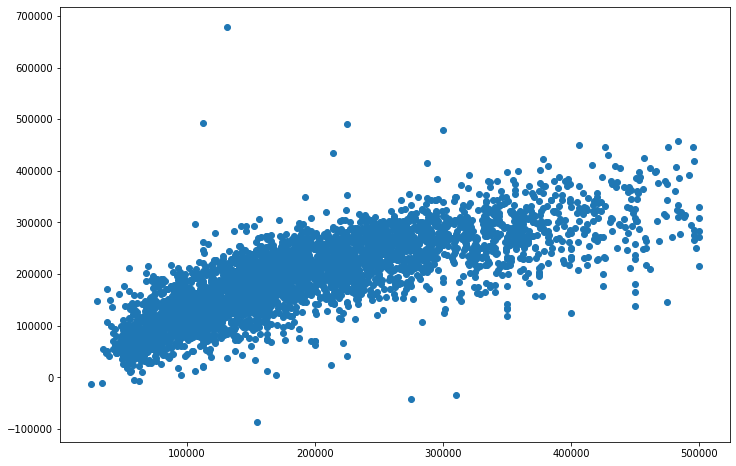

In [61]:
fig, ax = plt.subplots(figsize=(12,8))
plt.scatter(y_test, y_pred)
plt.show()